In [23]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import Draw

import sys
sys.path.append("../")
from Canonize import canonize
import numpy as np

import os
df=pd.read_csv("ci8b00324_si_002.csv")

stereochemical_tags = ['/', 's', 'r', 'S', 'R', 'E', 'Z', ':', '?']


In [18]:
df.head()

,COMPOUND,SMILES,CIP Labels,Blue Book Ref,Stereogenic Units,Sequence Rules,Figure,Different from CIP Labels,Rdkit + Canonize.py,balloon + Canonize.py,Unnamed: 10
0,VS001,C1[C@]2(CCCC1)CC=CC2,NaN,P-93.5.3.3,TH,NaN,NaN,0,8Z 9Z,8Z 9Z,1
1,VS002,C1=CCC=CC=C1,NaN,P-93.5.1.4.1,NaN,NaN,NaN,0,1Z 2Z 4Z 5Z 6Z 7Z,1Z 2Z 4Z 5Z 6Z 7Z,1
2,VS003,C[S@@](=O)C,NaN,P-93.3.3.2,TH,NaN,NaN,1,NaN,NaN,1
3,VS004,C1=CC=C2C(=C1)CCC=C2,NaN,P-93.5.4.1,NaN,NaN,NaN,0,9Z 10Z,9Z 10Z,1
4,VS005,OC=1C=CC=CC1[C@H](C2=CC=CC=C2O)O,NaN,NaN,TH,NaN,Figure 5,1,NaN,NaN,1


In [24]:
def get_stereo_str(filename):
    results = canonize(filename)
    return_str = ""
    for item in results:
        tag = stereochemical_tags[item['item'].stereochemistry]
        if tag != "/":
            return_str += str(item["original"] + 1) + tag + " "
    return return_str.strip()

In [25]:
get_stereo_str("balloon/VS031.sdf")

'3R'

# Assign tags from rdkit and balloon structures

In [26]:
rdkit_stereo_strs = []
balloon_stereo_strs = []
for i in range(len(df)):
    smi=df.iloc[i].SMILES
    compound=df.iloc[i].COMPOUND
    rdkit_stereo_strs.append(get_stereo_str(f"RDkit/{compound}.sdf"))
    if os.path.exists(f"balloon/{compound}_bad.sdf"):
        balloon_stereo_strs.append("X")
    else:
        balloon_stereo_strs.append(get_stereo_str(f"balloon/{compound}.sdf"))

In [27]:
df["RDKit"]=rdkit_stereo_strs
df["Balloon"]=balloon_stereo_strs

In [ ]:
df["CIP Labels"]

0                 NaN
1                 NaN
2                 NaN
3                 NaN
4                 NaN
            ...      
295         2S 9S 14S
296         2R 5S 13S
297          2R 4S 7R
298    2z 3z 5S 7z 9z
299         2s 4R 18S
Name: CIP Labels, Length: 300, dtype: object

In [33]:
modified_labels = []

for item in df["CIP Labels"]:
    if type(item) is float and np.isnan(item):
        modified_labels.append("")
    else:
        split_labels = item.split(" ")
        filtered_labels = [item for item in split_labels if item[-1] in stereochemical_tags]
        modified_labels.append(" ".join(filtered_labels))

In [34]:
df["modified_labels"]=modified_labels

In [38]:
new_results=df[["COMPOUND","SMILES","CIP Labels","modified_labels","RDKit","Balloon"]]

In [39]:
new_results["rdkit_correct"]=new_results["modified_labels"]==new_results["RDKit"]
new_results["balloon_correct"]=new_results["modified_labels"]==new_results["Balloon"]
new_results["either_correct"]=new_results["rdkit_correct"]|new_results["balloon_correct"]

/home/jerry/anaconda3/envs/torch/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/jerry/anaconda3/envs/torch/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/jerry/anaconda3/envs/torch/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

In [41]:
new_results.to_csv("new_results.csv",index=False)

In [43]:
new_results[~new_results.either_correct].to_csv("incorrect.csv",index=False)

# explore

VS032 O[C@H](/C=N\C)C1=NC=CC=C1


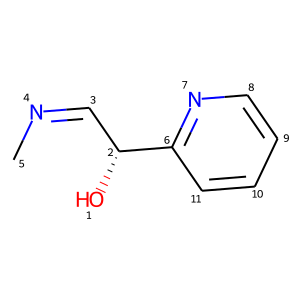

In [48]:
idx=31
smi=df.iloc[idx].SMILES
cmp=df.iloc[idx].COMPOUND
mol=Chem.MolFromSmiles(smi)
for atom in mol.GetAtoms():
    # For each atom, set the property "atomNote" to a index+1 of the atom
    atom.SetProp("atomNote", str(atom.GetIdx()+1))
print(cmp,smi)
Draw.MolToImage(mol)

VS120 O=C([C@@H]1CCCCCCCCCCCCCCCCCCCCCC[C@@H]2CCCCCCCCCCCCCCCCCC=[C@]=C1C2)O


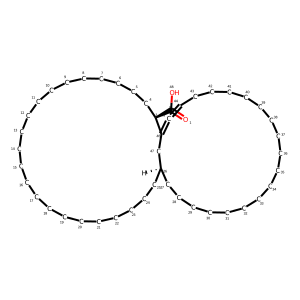

In [55]:
idx=119
smi=df.iloc[idx].SMILES
cmp=df.iloc[idx].COMPOUND
mol=Chem.MolFromSmiles(smi)
for atom in mol.GetAtoms():
    # For each atom, set the property "atomNote" to a index+1 of the atom
    atom.SetProp("atomNote", str(atom.GetIdx()+1))
print(cmp,smi)
Draw.MolToImage(mol)

In [9]:
ring_info=mol.GetRingInfo()

In [12]:
ring_info.MinAtomRingSize(12)

0